# Creating and Backtesting SMA/EMA Crossovers

- What is Cross SMA-EMA strategy ? 

> __Its really similar to cross `SMA` and cross `EMA` and the logic sance. Basicaly, its a combination of both of them.__

- Strategy: 
    1. We have one **EMA (with given windows size)** and one **SMA (with given windows size)**. 
    2. Where the __EMA__ > than __SMA__ -> its signal to BUY. 
        - > The logic behaind is that the __EMA__ more sensitive and dynamic to new prices, so its need to change quickly than the __SMA__.
    3. Where the __EMA__ < than __SMA__ -> its signal to SELL.

that's it. easy peasy. 

---

# Using the SMAEMABacktester Class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [2]:
from SMAEMABacktester import SMAEMABacktester as SMAEMA

In [3]:
pd.read_csv("../Data/forex_pairs.csv")

,Date,AUDEUR=X,EURUSD=X,USDGBP=X
0,2004-01-01,0.59780,1.258194,0.56016
1,2004-01-02,0.60314,1.258194,0.55751
2,2004-01-05,0.60467,1.268698,0.55334
3,2004-01-06,0.60350,1.272103,0.54906
4,2004-01-07,0.60728,1.264095,0.55012
...,...,...,...,...
4290,2020-06-24,0.61349,1.131235,0.79841
4291,2020-06-25,0.60938,1.125087,0.80561
4292,2020-06-26,0.61373,1.122208,0.80480
4293,2020-06-29,0.61128,1.122586,0.81023


__EUR / USD__

In [4]:
ptc = 0.00007

In [5]:
tester = SMAEMA("EURUSD=X", 50, 50, "2004-01-01", "2020-06-30", ptc)
tester

SMAEMABacktester(symbol = EURUSD=X, SMA = 50, EMA = 50, start = 2004-01-01, end = 2020-06-30)

In [6]:
tester.data

,price,returns,SMA,EMA
Date,,,,
2004-01-01,1.258194,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,NaN,NaN
2004-01-05,1.268698,0.008313,NaN,NaN
2004-01-06,1.272103,0.002681,NaN,NaN
2004-01-07,1.264095,-0.006315,NaN,NaN
...,...,...,...,...
2020-06-24,1.131235,0.002892,1.101794,1.109674
2020-06-25,1.125087,-0.005449,1.102486,1.110279
2020-06-26,1.122208,-0.002562,1.103213,1.110746


In [7]:
tester.test_strategy()

(1.157402, 0.237909)

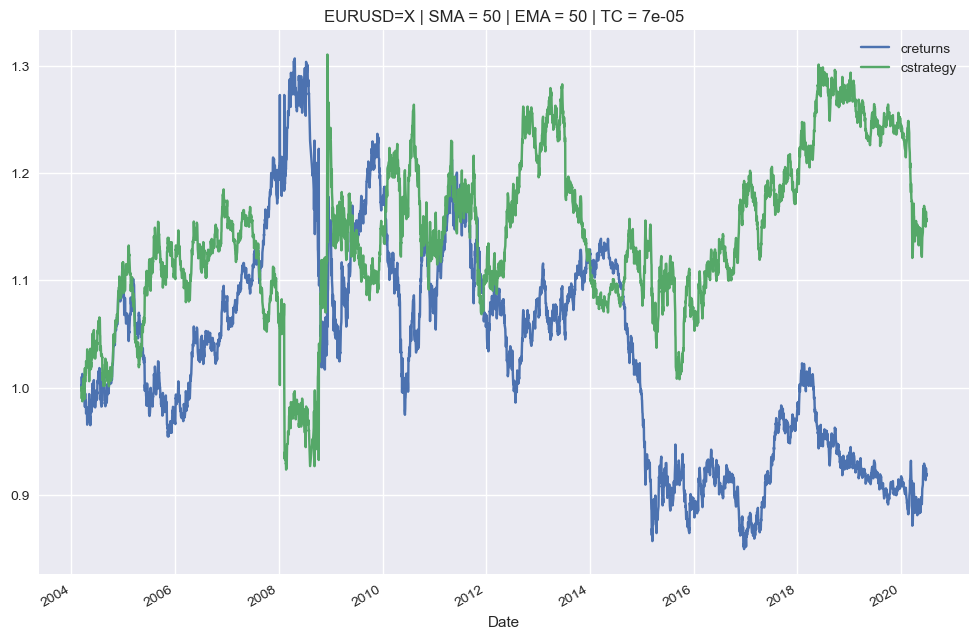

In [8]:
tester.plot_results()

In [9]:
tester.optimize_parameters((20, 100, 1), (20, 100, 1))

(array([43., 36.]), 1.924355)

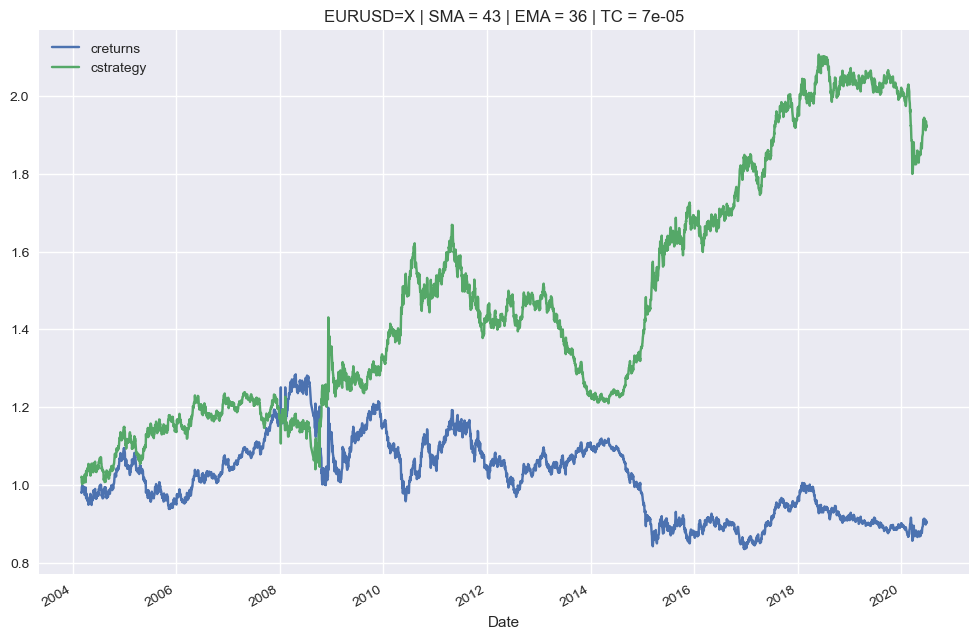

In [10]:
tester.plot_results()

In [11]:
tester.results

,price,returns,SMA,EMA,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,
2004-03-02,1.220405,-0.019794,1.261210,1.258758,-1,0.019794,0.0,0.980400,1.019992
2004-03-03,1.219096,-0.001073,1.260301,1.256422,-1,0.001073,0.0,0.979349,1.021087
2004-03-04,1.220703,0.001317,1.259185,1.254329,-1,-0.001317,0.0,0.980640,1.019743
2004-03-05,1.236797,0.013098,1.258364,1.253306,-1,-0.013098,0.0,0.993569,1.006473
2004-03-08,1.242607,0.004686,1.257864,1.252685,-1,-0.004686,0.0,0.998236,1.001768
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.104555,1.113598,1,0.002892,0.0,0.908766,1.935501
2020-06-25,1.125087,-0.005449,1.105548,1.114219,1,-0.005449,0.0,0.903828,1.924983
2020-06-26,1.122208,-0.002562,1.106472,1.114651,1,-0.002562,0.0,0.901515,1.920058


---

__AUD / EUR__

In [12]:
tester = SMAEMA("AUDEUR=X", 50, 50, "2004-01-01", "2020-06-30", 0)

In [13]:
tester.test_strategy()

(1.049912, 0.053484)

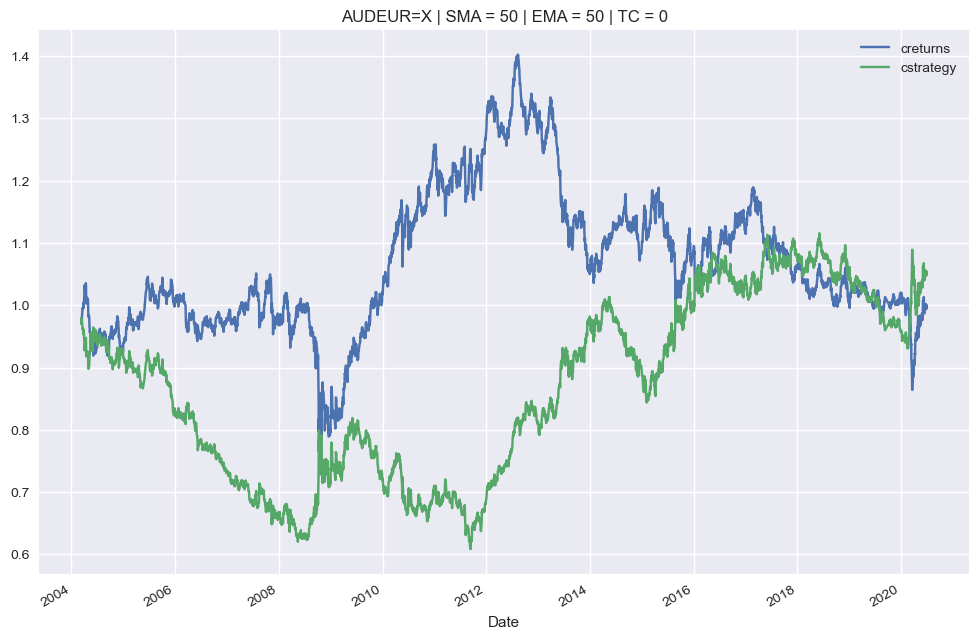

In [14]:
tester.plot_results()

In [15]:
tester.optimize_parameters((20, 100, 1), (20, 100, 1))

(array([26., 37.]), 2.837084)

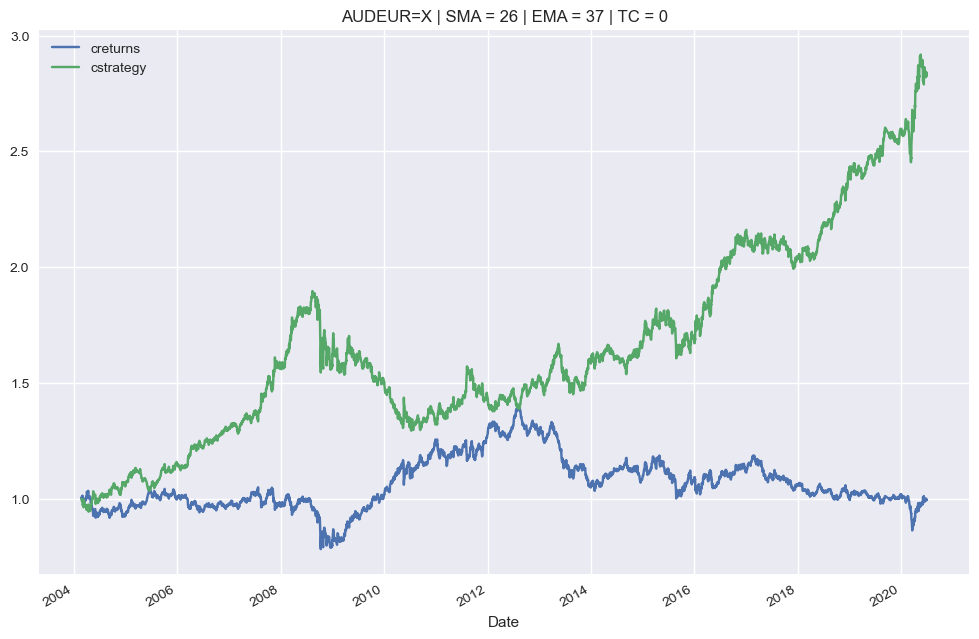

In [16]:
tester.plot_results()